In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Оптимизация памяти

In [2]:
train = pd.read_csv('Dataset/train.csv)
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [4]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [5]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

Здесь объекты типа object можно перевести в бинарный формат
Также необходимо перевести в формат int Число комнат и этажей в доме

In [6]:
train['Shops_2'] = (train['Shops_2'] == 'A').astype(int)
train['Ecology_3'] = (train['Ecology_3'] == 'A').astype(int)
train['Ecology_2'] = (train['Ecology_2'] == 'A').astype(int)

train['HouseFloor'] = train['HouseFloor'].astype('int64')
train['Rooms'] = train['Rooms'].astype('int64')

In [7]:
test['Shops_2'] = (test['Shops_2'] == 'A').astype(int)
test['Ecology_3'] = (test['Ecology_3'] == 'A').astype(int)
test['Ecology_2'] = (test['Ecology_2'] == 'A').astype(int)

test['HouseFloor'] = test['HouseFloor'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')

In [8]:
train = optimizing_df(train)
test = optimizing_df(test)

Проверяем все ли получилось

In [9]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  uint16 
 1   DistrictId     10000 non-null  uint8  
 2   Rooms          10000 non-null  uint8  
 3   Square         10000 non-null  float32
 4   LifeSquare     7887 non-null   float32
 5   KitchenSquare  10000 non-null  float32
 6   Floor          10000 non-null  uint8  
 7   HouseFloor     10000 non-null  uint8  
 8   HouseYear      10000 non-null  uint32 
 9   Ecology_1      10000 non-null  float32
 10  Ecology_2      10000 non-null  uint8  
 11  Ecology_3      10000 non-null  uint8  
 12  Social_1       10000 non-null  uint8  
 13  Social_2       10000 non-null  uint16 
 14  Social_3       10000 non-null  uint8  
 15  Healthcare_1   5202 non-null   float32
 16  Helthcare_2    10000 non-null  uint8  
 17  Shops_1        10000 non-null  uint8  
 18  Shops_2

In [10]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   uint16 
 1   DistrictId     5000 non-null   uint8  
 2   Rooms          5000 non-null   uint8  
 3   Square         5000 non-null   float32
 4   LifeSquare     3959 non-null   float32
 5   KitchenSquare  5000 non-null   float32
 6   Floor          5000 non-null   uint8  
 7   HouseFloor     5000 non-null   uint8  
 8   HouseYear      5000 non-null   uint16 
 9   Ecology_1      5000 non-null   float32
 10  Ecology_2      5000 non-null   uint8  
 11  Ecology_3      5000 non-null   uint8  
 12  Social_1       5000 non-null   uint8  
 13  Social_2       5000 non-null   uint16 
 14  Social_3       5000 non-null   uint8  
 15  Healthcare_1   2623 non-null   float32
 16  Helthcare_2    5000 non-null   uint8  
 17  Shops_1        5000 non-null   uint8  
 18  Shops_2 

### Обработка данных

In [11]:
train_num_features = train.select_dtypes(include=['float32', 'uint8'])
train_num_features.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,0.118858,0.009700,0.027500,24.687000,8.039200,1142.904419,1.319500,4.231300,0.082500,214139.218750
std,43.587592,0.839512,21.058718,86.241112,28.561113,5.241148,6.775974,0.119026,0.098015,0.163543,17.532614,23.831875,1021.518982,1.493601,4.806341,0.275139,92872.304688
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,0.017647,0.000000,0.000000,6.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,0.075424,0.000000,0.000000,25.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.648438
75%,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,0.195781,0.000000,0.000000,36.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.460938
max,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,0.521867,1.000000,1.000000,74.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.437500


1) 0 - комнат быть не может
2) площадь 1 кв м - минимальная и 640 кв м - максимальная - для квартиры очень странно
3) жилая площадь - минимальное 0,37 кв м, а максимальное - 7480 кв м
4) кол-во этажей в доме 0
5) кол-во этажей и комнат в доме в формате float64
6) очень странная площадь кухни 2014 кв м

In [12]:
test_num_features = test.select_dtypes(include=['float32', 'uint8'])
test_num_features.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449501,36.158760,5.976800,8.632000,12.601000,0.119874,0.009600,0.029800,24.933800,8.262600,1146.657227,1.31940,4.242800,0.082400
std,44.179466,0.838594,19.092793,17.825277,9.950147,5.483228,6.789213,0.120070,0.097518,0.170052,17.532202,23.863762,1044.744995,1.47994,4.777365,0.275001
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.906230,23.092026,1.000000,4.000000,9.000000,0.019509,0.000000,0.000000,6.000000,0.000000,325.000000,0.00000,1.000000,0.000000
50%,37.000000,2.000000,52.921339,32.925087,6.000000,7.000000,12.000000,0.072158,0.000000,0.000000,25.000000,2.000000,900.000000,1.00000,3.000000,0.000000
75%,77.000000,2.000000,66.285130,45.174091,9.000000,12.000000,17.000000,0.195781,0.000000,0.000000,36.000000,5.000000,1548.000000,2.00000,6.000000,0.000000
max,212.000000,17.000000,223.453690,303.071106,620.000000,78.000000,99.000000,0.521867,1.000000,1.000000,74.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


1) 0 - комнат быть не может 2) площадь 1 кв м - минимальная и 223 кв м - максимальная - для квартиры очень странно 3) жилая площадь - минимальное 0,33 кв м, а максимальное - 620 кв м 4) кол-во этажей и комнат в доме в формате float64 6) очень странная площадь кухни 620 кв м

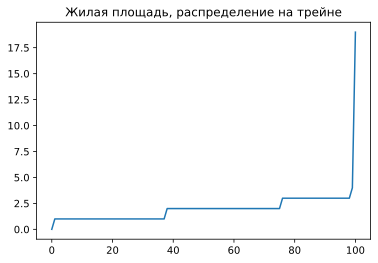

In [13]:
rooms_percentiles = [np.percentile(train_num_features['Rooms'], x) for x in np.arange(0, 101, 1)]
plt.title('Жилая площадь, распределение на трейне')
plt.plot(rooms_percentiles)

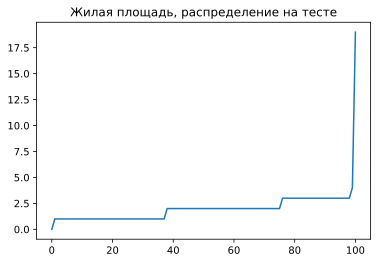

In [14]:
rooms_percentiles_test = [np.percentile(test_num_features['Rooms'], x) for x in np.arange(0, 101, 1)]
plt.title('Жилая площадь, распределение на тесте')
plt.plot(rooms_percentiles)

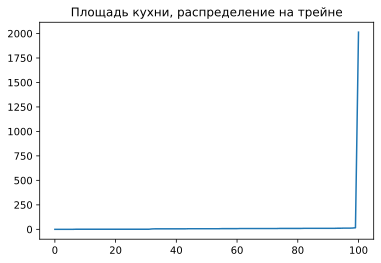

In [15]:
kitchen_percentiles = [np.percentile(train_num_features['KitchenSquare'], x) for x in np.arange(0, 101, 1)]
plt.title('Площадь кухни, распределение на трейне')
plt.plot(kitchen_percentiles)

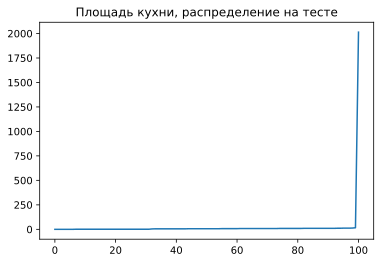

In [16]:
kitchen_percentiles_test = [np.percentile(test_num_features['KitchenSquare'], x) for x in np.arange(0, 101, 1)]
plt.title('Площадь кухни, распределение на тесте')
plt.plot(kitchen_percentiles)

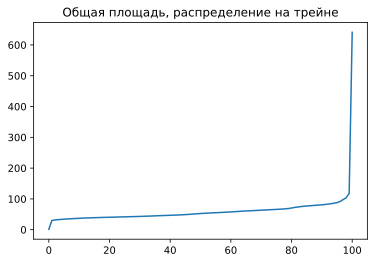

In [17]:
square_percentiles = [np.percentile(train_num_features['Square'], x) for x in np.arange(0, 101, 1)]
plt.title('Общая площадь, распределение на трейне')
plt.plot(square_percentiles)

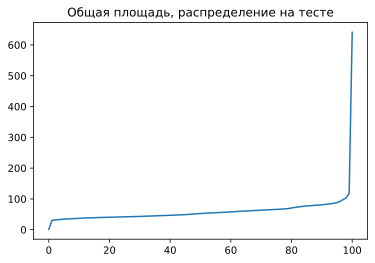

In [18]:
square_percentiles_test = [np.percentile(test_num_features['Square'], x) for x in np.arange(0, 101, 1)]
plt.title('Общая площадь, распределение на тесте')
plt.plot(square_percentiles)

#### Убираем пропуски

In [19]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['LifeSquare'].median()
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].median()

test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] = test['LifeSquare'].median()
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = test['Healthcare_1'].median()

In [20]:
total_rooms_max_value = np.quantile(train['Rooms'], q=0.975)

total_rooms_min_value = np.quantile(train['Rooms'], q=0.025)

condition = (train['Rooms'] > total_rooms_max_value) | (train['Rooms'] < total_rooms_min_value)

train.loc[condition, 'Rooms'] = train['Rooms'].median()
train['Rooms'].describe()

count    10000.000000
mean         1.853000
std          0.756603
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Rooms, dtype: float64

In [21]:
total_rooms_max_value_test = np.quantile(test['Rooms'], q=0.975)

total_rooms_min_value_test = np.quantile(test['Rooms'], q=0.025)

condition = (test['Rooms'] > total_rooms_max_value_test) | (test['Rooms'] < total_rooms_min_value_test)

test.loc[condition, 'Rooms'] = test['Rooms'].median()
test['Rooms'].describe()

count    5000.00000
mean        1.86600
std         0.74549
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         3.00000
Name: Rooms, dtype: float64

In [22]:
KitchenSquare_max_value = np.quantile(train['KitchenSquare'], q=0.975)

KitchenSquare_min_value = np.quantile(train['KitchenSquare'], q=0.025)

condition = (train['KitchenSquare'] > KitchenSquare_max_value) | (train['KitchenSquare'] < KitchenSquare_min_value)

train.loc[condition, 'KitchenSquare'] = train['KitchenSquare'].median()
train['KitchenSquare'].describe()

count    10000.000000
mean         5.536700
std          3.670607
min          0.000000
25%          1.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: KitchenSquare, dtype: float64

In [23]:
KitchenSquare_max_value_test = np.quantile(test['KitchenSquare'], q=0.975)

KitchenSquare_min_value_test = np.quantile(test['KitchenSquare'], q=0.025)

condition = (test['KitchenSquare'] > KitchenSquare_max_value_test) | (test['KitchenSquare'] < KitchenSquare_min_value_test)

test.loc[condition, 'KitchenSquare'] = test['KitchenSquare'].median()
test['KitchenSquare'].describe()

count    5000.000000
mean        5.530200
std         3.589824
min         0.000000
25%         1.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: KitchenSquare, dtype: float64

In [24]:
Square_max_value = np.quantile(train['Square'], q=0.975)

Square_min_value = np.quantile(train['Square'], q=0.025)

condition = (train['Square'] > Square_max_value) | (train['Square'] < Square_min_value)

train.loc[condition, 'Square'] = train['Square'].median()
train['Square'].describe()

count    10000.000000
mean        55.108208
std         15.215088
min         32.105270
25%         42.432730
50%         52.513309
75%         64.591721
max        100.904266
Name: Square, dtype: float64

In [25]:
Square_max_value_test = np.quantile(test['Square'], q=0.975)

Square_min_value_test = np.quantile(test['Square'], q=0.025)

condition = (test['Square'] > Square_max_value_test) | (test['Square'] < Square_min_value_test)

test.loc[condition, 'Square'] = test['Square'].median()
test['Square'].describe()

count    5000.000000
mean       55.450382
std        15.286421
min        32.113449
25%        42.703357
50%        52.921341
75%        65.215668
max       100.729996
Name: Square, dtype: float64

In [26]:
LifeSquare_max_value = np.quantile(train['LifeSquare'], q=0.975)

LifeSquare_min_value = np.quantile(train['LifeSquare'], q=0.025)

condition = (train['LifeSquare'] > LifeSquare_max_value) | (train['LifeSquare'] < LifeSquare_min_value)

train.loc[condition, 'LifeSquare'] = train['LifeSquare'].median()
train['LifeSquare'].describe()

count    10000.000000
mean        34.534420
std         11.451111
min         15.146290
25%         27.982506
50%         32.781261
75%         39.424684
max         78.384628
Name: LifeSquare, dtype: float64

In [27]:
LifeSquare_max_value_test = np.quantile(test['LifeSquare'], q=0.975)

LifeSquare_min_value_test = np.quantile(test['LifeSquare'], q=0.025)

condition = (test['LifeSquare'] > LifeSquare_max_value_test) | (test['LifeSquare'] < LifeSquare_min_value_test)

test.loc[condition, 'LifeSquare'] = test['LifeSquare'].median()
test['LifeSquare'].describe()

count    5000.000000
mean       34.688370
std        11.424918
min        14.525565
25%        28.166228
50%        32.925087
75%        39.660613
max        77.532036
Name: LifeSquare, dtype: float64

In [28]:
Healthcare_max_value = np.quantile(train['Healthcare_1'], q=0.975)

Healthcare_min_value = np.quantile(train['Healthcare_1'], q=0.025)

condition = (train['Healthcare_1'] > Healthcare_max_value) | (train['Healthcare_1'] < Healthcare_min_value)

train.loc[condition, 'Healthcare_1'] = train['Healthcare_1'].median()
train['Healthcare_1'].describe()

count    10000.000000
mean       954.963379
std        571.928894
min         30.000000
25%        830.000000
50%        900.000000
75%        900.000000
max       3300.000000
Name: Healthcare_1, dtype: float64

In [29]:
Healthcare_max_value_test = np.quantile(test['Healthcare_1'], q=0.975)

Healthcare_min_value_test = np.quantile(test['Healthcare_1'], q=0.025)

condition = (test['Healthcare_1'] > Healthcare_max_value_test) | (test['Healthcare_1'] < Healthcare_min_value_test)

test.loc[condition, 'Healthcare_1'] = test['Healthcare_1'].median()
test['Healthcare_1'].describe()

count    5000.000000
mean      947.269592
std       568.917114
min        30.000000
25%       810.000000
50%       900.000000
75%       900.000000
max      3300.000000
Name: Healthcare_1, dtype: float64

In [30]:
train.replace(to_replace={'HouseFloor': {0:train['HouseFloor'].mode()[0]}}, inplace=True)
train.replace(to_replace={'KitchenSquare': {0:train['KitchenSquare'].mode()[0]}}, inplace=True)

train.replace(to_replace={'KitchenSquare': {0:train['KitchenSquare'].mode()[0]}}, inplace=True)

In [31]:
test.replace(to_replace={'HouseFloor': {0:test['HouseFloor'].mode()[0]}}, inplace=True)
test.replace(to_replace={'KitchenSquare': {0:test['KitchenSquare'].mode()[0]}}, inplace=True)

test.replace(to_replace={'KitchenSquare': {0:test['KitchenSquare'].mode()[0]}}, inplace=True)

In [32]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12,20052011,0.136330,0,0,30,6141,10,262.0,3,6,0,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9,4968,0.319809,0,0,25,4756,16,2857.0,5,8,0,243028.609375


In [33]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

### Корреляция относительно "price"

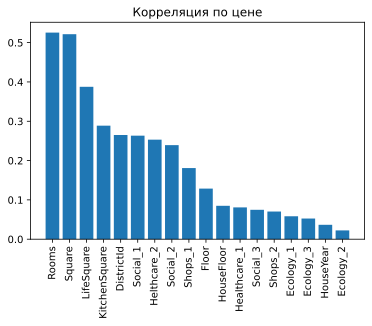

In [34]:
correl = train.loc[:, train.columns != 'Id'].corrwith(
    train['Price']).abs().sort_values(ascending=False)[1:]
plt.bar(correl.index, correl.values)
plt.title('Корреляция по цене')
plt.xticks(rotation='vertical')
plt.show()

### Построение модели

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [36]:
features = list(train.loc[:, train.columns != 'Id'].corrwith(train['Price']).abs().sort_values(ascending=False)[1:].index)
target = 'Price'

X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.3, random_state=42)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          7000 non-null   float64
 1   Square         7000 non-null   float32
 2   LifeSquare     7000 non-null   float32
 3   KitchenSquare  7000 non-null   float32
 4   DistrictId     7000 non-null   uint8  
 5   Social_1       7000 non-null   uint8  
 6   Helthcare_2    7000 non-null   uint8  
 7   Social_2       7000 non-null   uint16 
 8   Shops_1        7000 non-null   uint8  
 9   Floor          7000 non-null   uint8  
 10  HouseFloor     7000 non-null   uint8  
 11  Healthcare_1   7000 non-null   float32
 12  Social_3       7000 non-null   uint8  
 13  Shops_2        7000 non-null   uint8  
 14  Ecology_1      7000 non-null   float32
 15  Ecology_3      7000 non-null   uint8  
 16  HouseYear      7000 non-null   uint32 
 17  Ecology_2      7000 non-null   uint8  
dtypes: fl

In [38]:
y_train.head()

9069     88504.382812
2603    207007.953125
7738    182126.281250
1579    524365.562500
5058    322048.437500
Name: Price, dtype: float32

In [41]:
models_dict = {}

#### Random Forest Regressor

In [42]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

models_dict['Random Forest Regressor'] = random_forest

#### Gradient Boosting Regressor

In [43]:
gradient = GradientBoostingRegressor(n_estimators=90, max_depth=5, random_state=42)
gradient.fit(X_train, y_train)

models_dict['Gradient Boosting Regressor'] = gradient

### Выбор лучшей модели

In [44]:
def models_r2(models, test, valid):
    scores = pd.DataFrame(columns=['name', 'r2'])
    for name, model in models.items():
        test_pred = model.predict(test)
        r2 = r2_score(valid, test_pred)
        scores = scores.append(
            {'name': name, 'r2': r2}, ignore_index=True)
    scores.sort_values('r2', ascending=False, inplace=True)
    return scores

In [45]:
models_score_test = models_r2(models_dict, X_test, y_test)
models_score_train = models_r2(models_dict, X_train, y_train)

In [46]:
models_score_train

,name,r2
0,Random Forest Regressor,0.960789
1,Gradient Boosting Regressor,0.838218


In [47]:
models_score_test

,name,r2
1,Gradient Boosting Regressor,0.711186
0,Random Forest Regressor,0.710955


Видим,что с Random Forest модель сильно переобучена (сильно отличаются значения в трайне и тесте)

In [48]:
best_model = models_dict['Gradient Boosting Regressor']

In [49]:
test_features = list(X_train.columns)

In [50]:
test['Price'] = best_model.predict(test[test_features])

Финальный график, чтобы просмотреть распределение

mu = 214006.50 and sigma = 74138.75


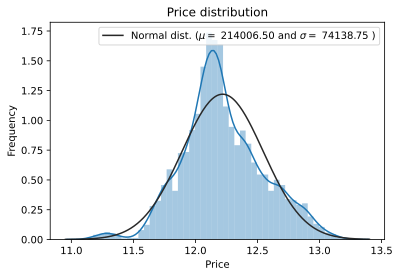

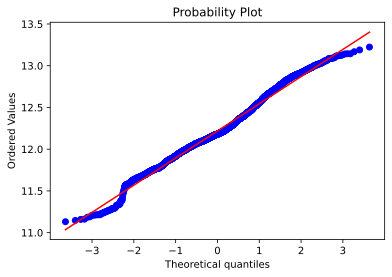

In [51]:
price_log = np.log1p(test['Price'])
sns.distplot(price_log, fit=norm)

mu, sigma = norm.fit(test['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(price_log, plot=plt)
plt.show()

Сохраняем в итоговый файл

In [52]:
test[['Id', 'Price']].to_csv('EPrilezhaeva_predictions.csv', index=None)

Проверяем, что все хорошо работает

In [53]:
predictions = pd.read_csv('EPrilezhaeva_predictions.csv')
predictions.head()

,Id,Price
0,725,165634.788528
1,15856,212393.616936
2,5480,190789.833792
3,15664,357641.515684
4,14275,132245.813155


In [54]:
predictions.shape

(5000, 2)